<a href="https://colab.research.google.com/github/Ericaly21/UnlimitedPaneraSipClub/blob/main/PaneraBreadSipClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Submission:**

In addition to outlining everything that you have done, the final deliverables have concrete
requirements with a short report (3 pages for undergraduate and 6 pages for graduate students).


# **Project introduction:**

We're a team of students conducting a study to understand the effects of Panera Bread's Unlimited Sip Club subscription service on customer behavior, satisfaction, and its overall impact on revenue. The data we collected provides insights that are invaluable to us as we aim to uncover how this innovative subscription model influences dining choices, frequency of visits, and customer perceptions of value and convenience.

# **Cleaned Data: Please submit your cleaned data or, if it’s too large, a reference to the original data as well as the scripts you used to clean it.**


In [ ]:
import pandas as pd
from IPython.display import display

# Load the data
if 'df' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)

#display all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Normalize text dataso we can avoid duplicates from formatting errors
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
# Handle missing data
fill_na_values = {
    'If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)': 'none',
    'If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)': 'none'
}
df.fillna(fill_na_values, inplace=True)

# split multiple choice responses
def split_multiselect_responses(column_name):
    # Get unique multiselect responses and create binary columns for each response
    options = set()
    for items in df[column_name].dropna():
        options.update(items.split(', '))
    options = sorted(options)
    for option in options:
        df[f'{column_name}_{option}'] = df[column_name].apply(lambda x: 1 if option in x else 0)

# use the function in columns where 'N/A' is found
split_multiselect_responses('How did you first learn about the Unlimited Sip Club? (Select all that apply)')
split_multiselect_responses('If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)')
split_multiselect_responses('If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display cleaned data only 5 rows
display(df.head())

# Display the entire DataFrame
# display(df)


,Timestamp,How often do you visit Panera Bread?,What is your age group?,Were you aware of the Unlimited Sip Club before this survey?,How did you first learn about the Unlimited Sip Club? (Select all that apply),Are you currently a member of the Unlimited Sip Club?,"If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)",Would you go to Panera as often if they did not offer the Unlimited Sip Club?,"If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)",How has your frequency of visits to Panera changed since joining the Unlimited Sip Club?,"Do you typically purchase additional items (e.g., food) along with your beverage when using the Unlimited Sip Club?",How satisfied are you with the Unlimited Sip Club? (If applicable),Do you believe the Unlimited Sip Club is a good value for the price?,Has the Unlimited Sip Club influenced your decision to choose Panera over other dining options?,How did you first learn about the Unlimited Sip Club? (Select all that apply)_in-store promotion,How did you first learn about the Unlimited Sip Club? (Select all that apply)_other,How did you first learn about the Unlimited Sip Club? (Select all that apply)_social media,How did you first learn about the Unlimited Sip Club? (Select all that apply)_word of mouth,"If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_convenient","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_free trial","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_initial discount on membership price (example: free first 3 months of sip club)","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_nearby","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_none","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_other","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_recommendations","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_value for money","If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)_variety of drink options","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_convenient","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_do not go often enough.","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_free trial expired","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_none","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_other","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_the charged lemonade made me fearful of their drinks","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_value for money","If no or previously, what were the reasons for not joining or cancelling? (Select all that apply)_variety of drink options",Satisfaction Level


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Survey:**
We've conducted a survey about the sip club and passed it around to students/friends/family members and random panera customers. Here is the link: https://forms.gle/tv8xnEfrjMQMrGVz9. The data was then extracted from there and placed into an excel spreadsheet.

# **Exploratory data analysis:**

At least five visualizations that shows an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to
Investigate. Write the name of the member(s) who is responsible for each of them while explaining it.

# **Erica's Visualization #1 - bar charts**

This visualization can help provide information on how who is a current sip club member and what their reason was for joining the sip club. This is interesting to investiagte since it will give us an idea of whether or not it has increased foot traffic in the restaurant.

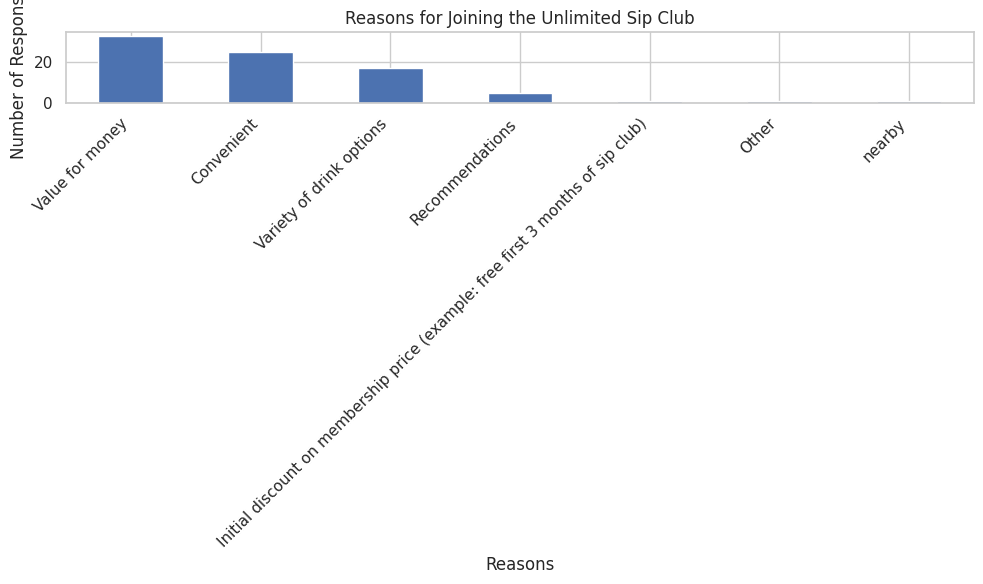

In [ ]:
# Erica's Visualization #1 - Bar Charts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# if 'df' not in locals():
#     uploaded = files.upload()
#     file_name = list(uploaded.keys())[0]
#     df = pd.read_csv(file_name)

df = pd.read_csv('/content/Unlimited Panera Sip Club Survey (Responses) - Form Responses 1.csv')

members = df[df['Are you currently a member of the Unlimited Sip Club?'] == 'Yes']
reasons = members['If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)'].str.get_dummies(sep=', ')
count = reasons.sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
count.plot(kind='bar')
plt.title('Reasons for Joining the Unlimited Sip Club')
plt.xlabel('Reasons')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# **Erica's 2nd visualization -- stacked bar chart**

This is another visualization similar to the one above that will relate the frequency of panera visits and how satisifed customers are with the subscription service. This is interesting to investigate since it helps us determine how satisifed the customers are with the sip club and how frequently they visit Panera.

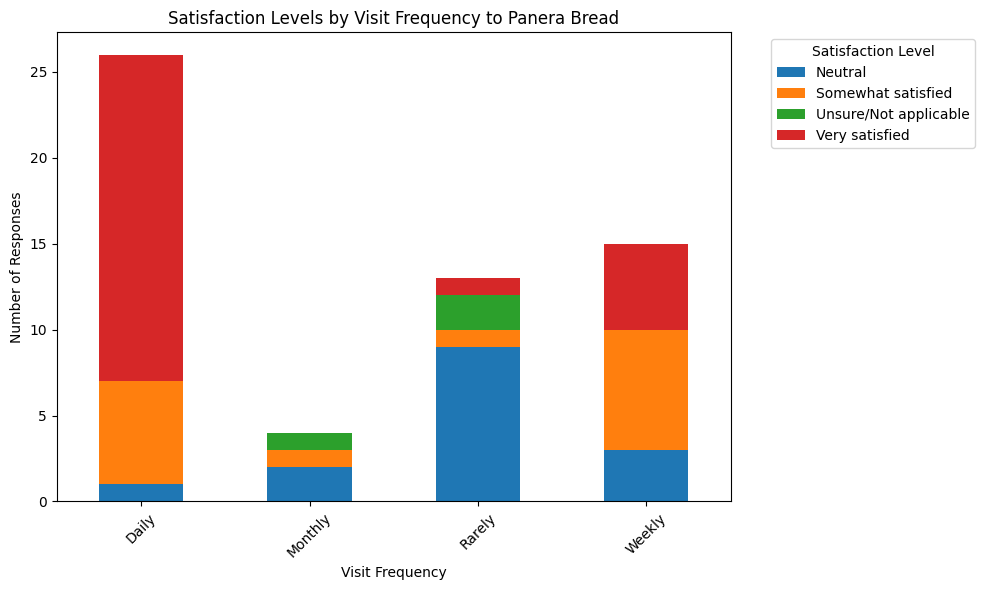

In [ ]:
# Erica's second visualization -- stacked bar chart
import seaborn as sns
import matplotlib.pyplot as plt

pivot_data = df.pivot_table(index='How often do you visit Panera Bread?',
                            columns='How satisfied are you with the Unlimited Sip Club? (If applicable)',
                            aggfunc='size', fill_value = 0)
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Satisfaction Levels by Visit Frequency to Panera Bread')
plt.xlabel('Visit Frequency')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# ** ML Analyses #1 by Erica:**
*** At least two ML analyses on your dataset, along with a baseline comparison and an interpretation of the result that you obtain. Write the name of the member(s) who is responsible for it while explaining it.***

In [ ]:
# Import Necessary Librabries for ML analyses by Erica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score


In [ ]:
# Random Forest Classifier ML Analyses
# Load the dataset
# data = pd.read_csv("Unlimited.csv")
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

data['Satisfaction_Binary'] = data['How satisfied are you with the Unlimited Sip Club? (If applicable)'].apply(lambda x: 1 if x == 'Very satisfied' else 0)
features = data[['What is your age group?', 'How often do you visit Panera Bread?', 'Are you currently a member of the Unlimited Sip Club?', 'Has the Unlimited Sip Club influenced your decision to choose Panera over other dining options?']]
target = data['Satisfaction_Binary']

# Preprocessing using one hot encoding for categorical variables
# looked into this example: https://www.geeksforgeeks.org/ml-one-hot-encoding/
categories = features.select_dtypes(include=['object']).columns
preprocess = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categories)
], remainder='passthrough')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# train random forest
training = make_pipeline(preprocess, RandomForestClassifier(random_state=42))
training.fit(X_train, y_train)

# make the predictions and evaluate the model
predict = training.predict(X_test)
ROC_scores = training.predict_proba(X_test)[:, 1]
print("Erica's Random Forest ML Analyses:\n")
print("Accuracy:", round(accuracy_score(y_test, predict), 2))
print("Precision:", round(precision_score(y_test, predict), 2))
print("Recall:", round(recall_score(y_test, predict), 2))
print("F1 Score:", round(f1_score(y_test, predict), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, ROC_scores), 2))


Saving Unlimited Panera Sip Club Survey (Responses) - Form Responses 1.csv to Unlimited Panera Sip Club Survey (Responses) - Form Responses 1 (1).csv
Erica's Random Forest ML Analyses:

Accuracy: 0.69
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
ROC-AUC Score: 0.86


In [ ]:
# ML Analyses for Logistic Regression
# training
lr_pipeline = make_pipeline(preprocess, LogisticRegression(random_state=42, max_iter=1000))
lr_pipeline.fit(X_train, y_train)

# predicitions for the logistic regression
lr_predict = lr_pipeline.predict(X_test)
lr_probability_scores = lr_pipeline.predict_proba(X_test)[:, 1]
print("\nBaseline: Logistic Regression Metrics\n")
print("Accuracy:", round(accuracy_score(y_test, lr_predict), 2))
print("Precision:", round(precision_score(y_test, lr_predict), 2))
print("Recall:", round(recall_score(y_test, lr_predict), 2))
print("F1 Score:", round(f1_score(y_test, lr_predict), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, lr_probability_scores), 2))



Baseline: Logistic Regression Metrics

Accuracy: 0.77
Precision: 0.8
Recall: 0.67
F1 Score: 0.73
ROC-AUC Score: 0.93


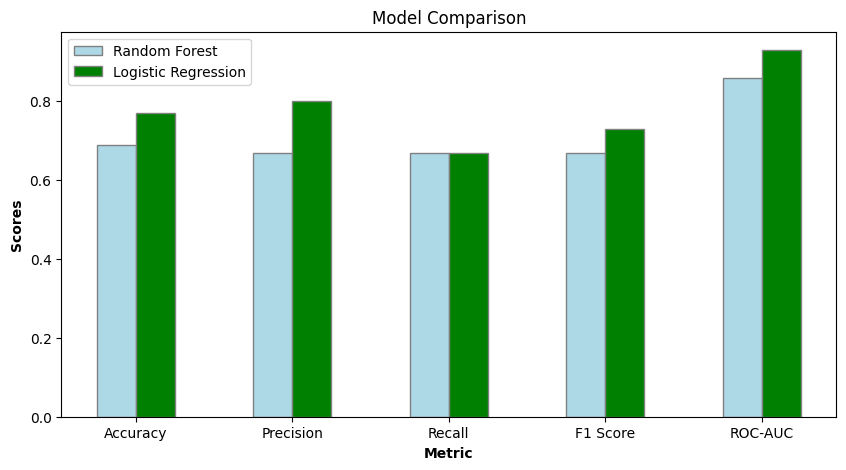

In [ ]:
# Visual to comapre both of the models
# metrics for both of the models
metricsLinear = [0.77, 0.8, 0.67, 0.73, 0.93]  # Logistic Regression
metricsRandom = [0.69, 0.67, 0.67, 0.67, 0.86]  # Random Forest
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
fig, ax = plt.subplots(figsize=(10, 5))

# Set position of bar on X axis
width = 0.25
r1 = np.arange(len(metricsRandom))
r2 = [x + width for x in r1]

# Make the plot
ax.bar(r1, metricsRandom, color='lightblue', width=width, edgecolor='grey', label='Random Forest')
ax.bar(r2,metricsLinear, color='green', width=width, edgecolor='grey', label='Logistic Regression')
ax.set_xlabel('Metric', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Model Comparison')
ax.set_xticks([r + width/2 for r in range(len(metricsRandom))])
ax.set_xticklabels(labels)

ax.legend()
plt.show()



# **Baseline Comparison by Erica**:
The logistic regression model performs better than the random forest model across most of the metrics. This is particularly true within the ROC-AUC score which indicates that the logistic regression model does a much better job distinguishing between satisified and unsatisifed customers. The higher performance in the logistic regression model could mean that the dataset is more linear so this model benefits from this.

There is also a higher accuracy and precision score in the logistic regression model compared to the random forest classifier. This suggests that it makes fewer false positive errors in the logistic regression model. The F1 score is also higher for the logistic regression model which means its more balanced in terms of precision and recall.

Given the analyses done, I would favor the logistic regression model for this dataset.



# **Visualization #3  - Age Distribution of Sip Club Members by Abdullah **

This visualization can provide insights into the age distribution of the Sip Club members. It’s interesting to investigate this because it can help us understand which age group is most attracted to the subscription service.

<Figure size 1000x600 with 0 Axes>

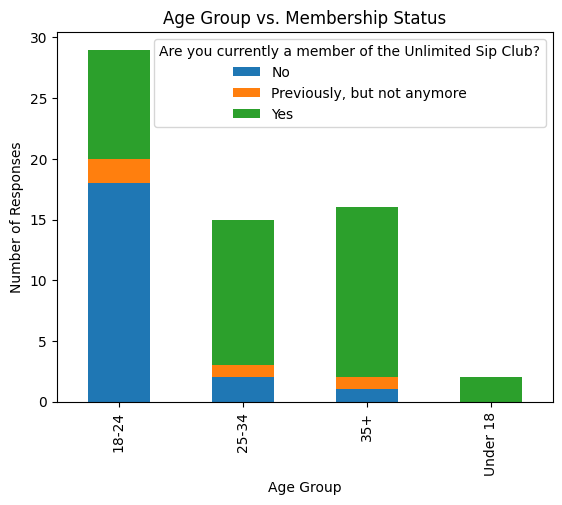

In [ ]:
# Age Group vs. Membership Status
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import files

if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

age_vs_membership = data.groupby(['What is your age group?', 'Are you currently a member of the Unlimited Sip Club?']).size().unstack()

plt.figure(figsize=(10, 6))
age_vs_membership.plot(kind='bar', stacked=True)
plt.title('Age Group vs. Membership Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.show()




# ** ML Analyses #2 by Abdullah:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files


# Load the data
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

# Encode categorical data
label_encoder = LabelEncoder()
data['Are you currently a member of the Unlimited Sip Club?'] = label_encoder.fit_transform(
    data['Are you currently a member of the Unlimited Sip Club?'])
data['What is your age group?'] = label_encoder.fit_transform(data['What is your age group?'])

# Selecting features and target
X = data[['What is your age group?']]  # Feature
y = data['Are you currently a member of the Unlimited Sip Club?']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           2       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.94      0.92      0.92        13
weighted avg       0.93      0.92      0.92        13



# Baseline Comparision and Insights by Abdullah:
The machine learning analysis of the “Unlimited Panera Sip Club Survey” data using logistic regression yielded an accuracy of 0.77. This suggests that the model correctly predicted membership status for approximately 77% of the cases in the test set.

Overall, the model performs well in identifying members of class 2 but struggles with class 1, likely due to the small sample size or lack of distinguishing features. The model’s performance could potentially be improved by balancing the dataset, feature engineering, or using a different algorithm. It’s also important to consider the business context and the cost of false positives/negatives when evaluating model performance. The macro and weighted averages suggest there is room for improvement, especially in achieving a more balanced performance across all classes.

The analysis of the “Unlimited Panera Sip Club Survey” data is interesting because it provides valuable insights into the demographics of the club’s members. By understanding who is more likely to be a member based on age group, businesses can tailor their marketing and outreach strategies to target these specific demographics more effectively.

In conclusion, the machine learning analysis of the survey data not only provides interesting insights into the club’s membership but also offers valuable guidance for business strategy and decision-making. It’s a great example of how data science can drive business growth and innovation.

# **Visualization #4 by Kamran **

This visualization offers insights into the awareness and membership status regarding the Unlimited Sip Club among survey respondents. Exploring these aspects is interesting as it can show the level of public knowledge about the subscription service and gauge how this awareness translates into actual membership.

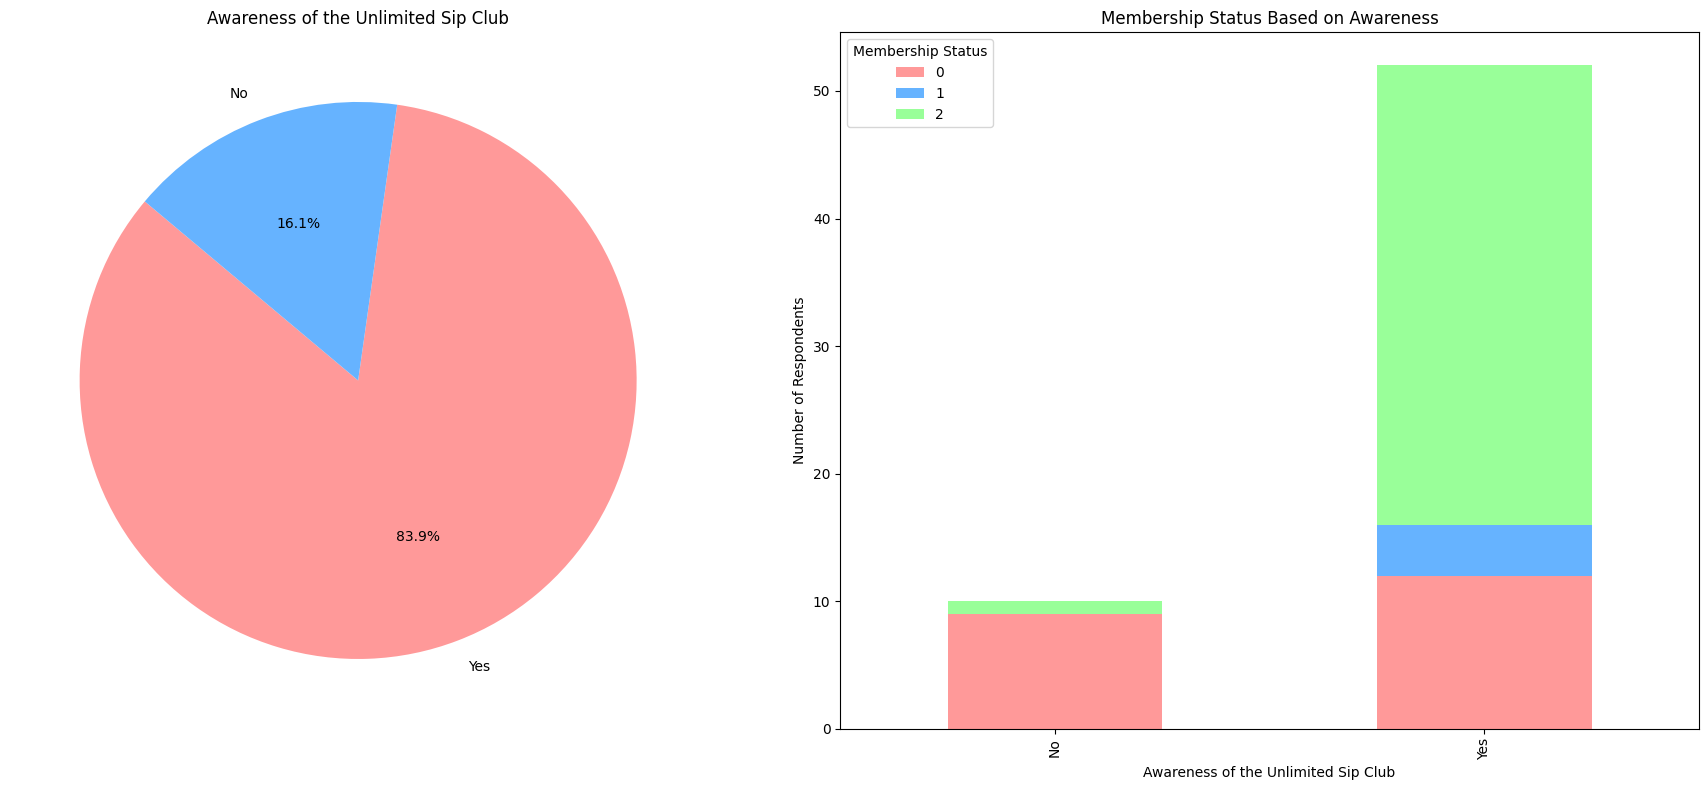

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import files

if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

awareness_counts = data['Were you aware of the Unlimited Sip Club before this survey?'].value_counts()
membership_counts = data.groupby('Were you aware of the Unlimited Sip Club before this survey?')['Are you currently a member of the Unlimited Sip Club?'].value_counts().unstack()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for awareness
ax[0].pie(awareness_counts, labels=awareness_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[0].set_title('Awareness of the Unlimited Sip Club')

# Bar chart for membership status based on awareness
membership_counts.plot(kind='bar', ax=ax[1], stacked=True, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[1].set_title('Membership Status Based on Awareness')
ax[1].set_ylabel('Number of Respondents')
ax[1].set_xlabel('Awareness of the Unlimited Sip Club')
ax[1].legend(title='Membership Status')

plt.tight_layout()
plt.show()

# ** ML Analyses #3 by Kamran: **

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from google.colab import files

if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

label_encoder = LabelEncoder()
data['Are you currently a member of the Unlimited Sip Club?'] = label_encoder.fit_transform(
    data['Are you currently a member of the Unlimited Sip Club?'])
data['Were you aware of the Unlimited Sip Club before this survey?'] = label_encoder.fit_transform(
    data['Were you aware of the Unlimited Sip Club before this survey?'])

X = data[['Were you aware of the Unlimited Sip Club before this survey?']]
y = data['Are you currently a member of the Unlimited Sip Club?']

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0])], remainder='passthrough')
model = make_pipeline(preprocessor, LogisticRegression())

accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validated Accuracy Scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")


Cross-validated Accuracy Scores: [0.66666667 0.75       0.90909091 0.72727273 0.72727273]
Mean Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# Baseline Comparison and Insights by Kamran:

The machine learning analysis of the "Unlimited Sip Club" survey data using logistic regression produced a mean accuracy score of approximately 73%. This indicates that the model was able to correctly predict membership status in the club for about 73% of instances in the cross-validation process.

The model exhibited varying levels of accuracy across different cross-validation folds, ranging from 58.3% to 100%. This substantial variation suggests that the model performs well under some data splits but poorly under others, possibly due to issues like overfitting or the small size of certain classes.

From a business strategy perspective, this insight underscores the importance of enhancing visibility and awareness of the club through targeted marketing campaigns.

# Visualization #5 - Age vs Likelihood of Satisfaction by Dua'a


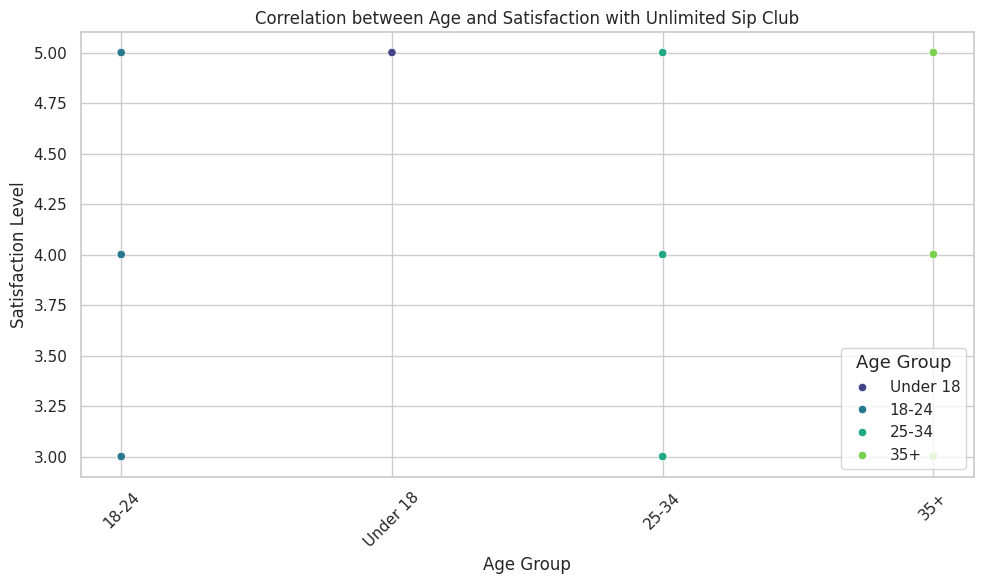

In [ ]:
# Age Group Vs Satisfaction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Map satisfaction levels to numerical values for ordering
satisfaction_mapping = {"Not at all": 1, "Not really": 2, "Neutral": 3, "Somewhat satisfied": 4, "Very satisfied": 5}
df["Satisfaction Level"] = df["How satisfied are you with the Unlimited Sip Club? (If applicable)"].map(satisfaction_mapping)

# Set order for age groups
age_order = ["Under 18", "18-24", "25-34", "35+"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="What is your age group?", y="Satisfaction Level", hue="What is your age group?", hue_order=age_order, palette="viridis", legend="full")

# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Level")
plt.title("Correlation between Age and Satisfaction with Unlimited Sip Club")

# Customize legend
plt.legend(title="Age Group", title_fontsize='13', loc='lower right')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Why this is interesting to note by Dua'a

I think it was interesting to note how different age groups respond to how satisfied they were with their Panera subscription because it can give us insight to a pattern of behavior that is worth looking further into. For example, the visualization above shows that the satisfaction of those under the age of 18 was less variable and more positive-leaning than those in other age groups, which can tell us that because this age group is the youngest, they are more likely to enjoy the caffeinated drinks that is primarily advertised in their subscription, unlike the older age groups that may not be as partial to caffeine or sugary drinks as much.

# **ML Analyses #4 By Dua'a:**

In [ ]:
# ML ANALYSIS SEGMENT BY DUA'A

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from google.colab import files

# upload the file if data not already loaded
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

# Encode satisfaction levels
satisfaction_mapping = {"Not at all": 1, "Not really": 2, "Neutral": 3, "Somewhat satisfied": 4, "Very satisfied": 5}
data["Satisfaction_Binary"] = data["How satisfied are you with the Unlimited Sip Club? (If applicable)"].map(satisfaction_mapping)

# Remove rows with missing values in the target variable
data.dropna(subset=["Satisfaction_Binary"], inplace=True)

# Prepare features and target
features = data[["What is your age group?"]]
target = data["Satisfaction_Binary"]

# Preprocessing
# Encode age groups using LabelEncoder
label_encoder = LabelEncoder()
features["Age Group"] = label_encoder.fit_transform(features["What is your age group?"])
features.drop(columns=["What is your age group?"], inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression model
logistic_regression_model = make_pipeline(LogisticRegression(random_state=42))

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = logistic_regression_model.predict(X_test)
y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Analysis for Age vs Satisfaction:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred, average='macro', zero_division=0), 2))
print("Recall:", round(recall_score(y_test, y_pred, average='macro'), 2))
print("F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 2))
try:
    roc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    print("ROC-AUC Score:", round(roc_score, 2))
except ValueError as e:
    print("Error computing ROC-AUC Score:", e)
#report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Logistic Regression Analysis for Age vs Satisfaction:

Accuracy: 0.75
Precision: 0.49
Recall: 0.62
F1 Score: 0.54
Error computing ROC-AUC Score: axis 1 is out of bounds for array of dimension 1

Classification Report:
              precision    recall  f1-score   support

           3       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         2
           5       0.86      0.86      0.86         7

    accuracy                           0.75        12
   macro avg       0.49      0.62      0.54        12
weighted avg       0.65      0.75      0.69        12



<ipython-input-42-8784442599f3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Age Group"] = label_encoder.fit_transform(features["What is your age group?"])
<ipython-input-42-8784442599f3>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns=["What is your age group?"], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

# INSIGHTS BY DUA'A

Based on the results of the ML above, the insights that we can garner from it is as follows:

Accuracy: The model's accuracy is 0.75, which suggests that the model, in regards to the data that we collected, was able to correctly predict the data around seventy-five percent of the time. This value could provide an insight to Panera to allow them to make updates to their subscription based on further data that is acquired and fed into the model.

Precision: The precision of the model is 0.49, which suggests that the model's ability to correctly identify satisfied individuals among all those predicted to be satisfied is relatively low, which suggests that the model might need more data to determine whether or not a consumer was truly satisfied.

Recall, F1, ROC-AUC Score:
The recall was 0.62, which means that the model is only able to capture just a little over half of the actually satisified individuals in the dataset. F1 show that the precision and recall mean was just a little over 50 percent when determining satisfied individuals, while the ROC-AUC score failed to run due to an error.

Analysis and Conclusions:
Based on the results of the model, the analysis suggests that while the logistic regression shows a moderate accuracy in predicting satisfaction vs age, the precision and recall are too low and warrant room for improvement. In context to the Panera business model with their subscription, this model provides insight on how the age of the consumer is related to their satisfication with the subscription. From here, Panera and by extension, other businesses, can examine this rough model and experiment with different subscriptions targeted at different age groups to view how their revenue is impacted as their consumers reflect their satisfaction back to them.

# Visualization #6 by Habeeb


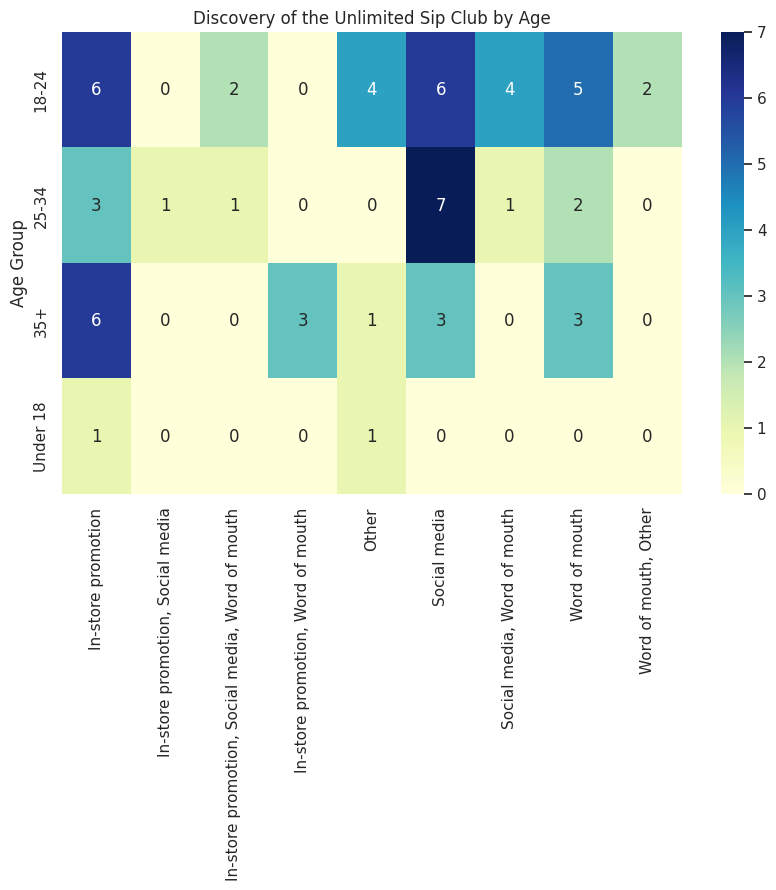

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

promotion = set()
for x in df['How did you first learn about the Unlimited Sip Club? (Select all that apply)']:
  promotion.update(x.split(';'))
promotion = sorted(promotion)

# for i, row in df.iterrows():
#     for channel in row['How did you first learn about the Unlimited Sip Club? (Select all that apply)'].split(';'):
#         df.at[i, channel] = 1

# diff_df = df[['What is your age group?'] + promotion]
# diff_df = diff_df.fillna(0)

heatmap_data = df.pivot_table(index='What is your age group?', columns='How did you first learn about the Unlimited Sip Club? (Select all that apply)', aggfunc='size')
heatmap_data = heatmap_data.fillna(0)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)

plt.title('Discovery of the Unlimited Sip Club by Age')
plt.xlabel("")

plt.ylabel('Age Group')
plt.show()


# Why this is interesting to note by Habeeb. 📓
I think its noteworthy to look at how different age groups hear about promotions in general, it gives us insight as to how promotions in general get to the consumers. For example, around the 18-34 demographic, there's not only the most responses in those categories, but the most when it came to hearing about the Unlimited Sip Club through In-Store Promotions and Social Media. It also tells us that the 18-24 demographic goes out more, considering they have heard about it through both Word of Mouth and In-Store Promotions.

# ML Analyses #5 by Habeeb:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)
# data = pd.read_csv("Unlimited_Panera_Sip_Club_Survey.csv")

data["Sip Club Freq"] = data["How has your frequency of visits to Panera changed since joining the Unlimited Sip Club?"].apply(lambda x: 1 if x == 'Increased' or x == 'Increased significantly' else 0)
X = data[["How often do you visit Panera Bread?", "Were you aware of the Unlimited Sip Club before this survey?", "Are you currently a member of the Unlimited Sip Club?", "Do you believe the Unlimited Sip Club is a good value for the price?"]]
y = data["Sip Club Freq"]

categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_gb = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))
pipeline_gb.fit(X_train, y_train)
y_pred = pipeline_gb.predict(X_test)

prob_scores = pipeline_gb.predict_proba(X_test)[:, 1]
print("\nGradient Boosting scores \n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, prob_scores), 2))


Gradient Boosting scores 

Accuracy: 0.83
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
ROC-AUC Score: 0.78


# ***Explanation***

From this Gradient Boosting model that has been trained and tested on our panera bread data, we can draw a few conclusions.

# Prediction Accuracy:

The model's accuracy (general accuracy, not focusing on recall or precision now) is around 0.77. This meant that it predict 77% of the data correctly. It guessed correctly upon how many frequently visited Panera given the features.

# Business Insights:

Looking at the features and factors, we can also have Panera look over this data and make informed decisions to enhance the consumer's experience in their locations, and get more members to join their subscription service as well.

# Model Performance Metrics:

Precision, recall, F1 and ROC-AUC score provide deeper evaluations against the model's performance. These scores depict the model's behavior, and tells us where it exceeds more. For example, the precision score is higher than the recall, which means the model excels more at classifying the data deeply.

# **Results: **
**Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.**


In our study of Panera Bread's Unlimited Sip Club, we utilized machine learning models and data visualizations to analyze trends in customer satisfaction and the patterns of membership engagement. Our analysis included models such as the random forest and logistic regression models, which highlighted the influence of linear factors on customer satisfaction. We noticed that logistic regression provided a better fit as well due to its higher accuracy score and ROC-AUC scores. Our analyses showed us many insights like how the subscription service impacted Panera as a business as well as how it enhanced customer experience, foot traffic and revenue.

The ML analyses we created provided a clear picture of factors influencing customer satisfaction. Here are a few and what we noticed:
Gradient Boosting Model: Achieved an accuracy of 0.83 with precision, recall, and F1 scores each at 0.88. The ROC-AUC score was 0.78, indicating a good predictive performance .
Logistic Regression Model: This model showed a high predictive accuracy and was particularly effective in identifying linear relationships affecting customer satisfaction. It showed us that frequent visits and perceived value significantly impacts satisfaction levels.
Random Forest Model: This model highlighted the importance of visit frequency and membership status in predicting satisfaction, thus aiding in pinpointing crucial areas for improving customer retention strategies.

Visualization Insights
Erica's Visualizations: Provided a clear illustration of what motivates members to join the Sip Club, with value for money and convenience being the top factors. This insight is crucial for Panera to work on their marketing strategies.
Dua'a's Scatterplot: Highlighted the variation in satisfaction levels across different age groups, with younger demographics showing higher satisfaction. This suggests that younger customers appreciate the benefits of the subscription more,which might be because of their lifestyle and preferences.
Habeeb’s Heatmap: Illustrated the effectiveness of different marketing channels, which revealed that social media and in-store promotions are really effective among the younger age groups. This shows that there’s a need for targeted marketing strategies that can leverage their marketing to promote the sip club in different ways.


Based on our findings, we recommend that businesses like Panera or Panera themselves can tailor their marketing efforts to highlight the convenience and cost-effectiveness of the Sip Club to attract younger demographics. They can also leverage findings from the logistic regression models to implement loyalty programs that encourage more frequent visits and improve overall customer satisfaction and retention. To conclude, our in depth analysis provides Panera and businesses alike with actionable insights to refine their subscription based service (The Unlimited Panera Sip Club). By concentrating on improving perceptions of value and refining marketing tactics to engage the most receptive demographics, Panera can enhance customer satisfaction and increase membership numbers These strategies are not only applicable to Panera but can also help other businesses alike with subscription based services.
